# Cell density and composition

### Cell density

In [1]:
from voxcell import VoxelData, RegionMap
import bluepy.sonata
from bluepy.sonata.bbp import Cell
from voxcell.nexus.voxelbrain import Atlas
import pandas as pd
import numpy as np

In [2]:
circuit_path = '/gpfs/bbp.cscs.ch/project/proj42/home/arseny/circuits/20181114.dev/sonata/circuit_config.json'
atlas_path = '/gpfs/bbp.cscs.ch/project/proj42/entities/dev/atlas/O1-243/'

In [3]:
circuit = bluepy.sonata.Circuit(circuit_path, cells='All')

In [4]:
atlas = Atlas.open(atlas_path)
brain_regions = atlas.load_data('brain_regions')
hierarchy = atlas.load_hierarchy()

In [5]:
regions = ['CA1', 'SLM', 'SR', 'SP', 'SO']
df = pd.DataFrame(index=regions, columns=np.arange(7))
df.head()

,0,1,2,3,4,5,6
CA1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SLM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SO,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
scale = 1000000

for idx in range(7):
    mod = []
    ids1 = hierarchy.collect('acronym', 'mc'+str(idx), 'id')
    gids1 = circuit.cells.ids({Cell.REGION: {'$regex': 'mc%d;.*' % idx}})
    
    # Neurons in CA1
    mod.append(len(gids1) * scale / brain_regions.volume(ids1))
    
    # SLM neurons in SLM
    ids2 = hierarchy.collect('acronym', 'mc'+str(idx)+';SLM', 'id')
    ids = ids1.intersection(ids2)
    gids2 = circuit.cells.ids('SLM')
    gids = np.intersect1d(gids1, gids2)
    mod.append(len(gids) * scale / brain_regions.volume(ids))
    
    # SR neurons in SR
    ids2 = hierarchy.collect('acronym', 'mc'+str(idx)+';SR', 'id')
    ids = ids1.intersection(ids2)
    gids2 = circuit.cells.ids('SR')
    gids = np.intersect1d(gids1, gids2)
    mod.append(len(gids) * scale / brain_regions.volume(ids))
    
    # SP neurons in SP
    ids2 = hierarchy.collect('acronym', 'mc'+str(idx)+';SP', 'id')
    ids = ids1.intersection(ids2)
    gids2 = circuit.cells.ids('SP')
    gids = np.intersect1d(gids1, gids2)
    mod.append(len(gids) * scale / brain_regions.volume(ids))
    
    # SO neurons in SO
    ids2 = hierarchy.collect('acronym', 'mc'+str(idx)+';SO', 'id')
    ids = ids1.intersection(ids2)
    gids2 = circuit.cells.ids('SO')
    gids = np.intersect1d(gids1, gids2)
    mod.append(len(gids) * scale / brain_regions.volume(ids))
    
    df[idx] = mod
                            
df.head()

,0,1,2,3,4,5,6
CA1,25.593234,26.878509,25.148287,26.129441,25.773504,26.390714,25.427249
SLM,0.000000,0.000000,0.000000,0.043516,0.000000,0.043802,0.043516
SR,0.094482,0.117327,0.166445,0.093249,0.023465,0.117327,0.163185
SP,279.210758,292.159439,273.746116,283.833768,280.989926,286.793693,276.327241
SO,0.661376,1.043519,0.744106,1.075104,0.850274,1.004870,0.883121


In [7]:
means = df.mean(axis=1)
stds = df.std(axis=1)
df['mean'] = means
df['std'] = stds
df.head()

,0,1,2,3,4,5,6,mean,std
CA1,25.593234,26.878509,25.148287,26.129441,25.773504,26.390714,25.427249,25.905848,0.598520
SLM,0.000000,0.000000,0.000000,0.043516,0.000000,0.043802,0.043516,0.018691,0.023311
SR,0.094482,0.117327,0.166445,0.093249,0.023465,0.117327,0.163185,0.110783,0.048524
SP,279.210758,292.159439,273.746116,283.833768,280.989926,286.793693,276.327241,281.865849,6.305254
SO,0.661376,1.043519,0.744106,1.075104,0.850274,1.004870,0.883121,0.894624,0.156022


### Composition per layer

In [8]:
from voxcell import VoxelData, RegionMap
import bluepy
from bluepy.v2.enums import Cell
from voxcell.nexus.voxelbrain import Atlas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
mtypes = circuit.cells.get(properties=Cell.MTYPE).unique()

In [10]:
columns = range(7)

In [11]:
composition = pd.DataFrame(index=mtypes, columns=columns)
composition.head()

,0,1,2,3,4,5,6
SLM_PPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SR_SCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SP_PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SP_PVBC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SP_CCKBC,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
for column in columns:
    for mtype in mtypes:
        composition[column][mtype] = circuit.cells.count({Cell.MTYPE: mtype, Cell.REGION: {'$regex': 'mc%d;.*' % column}})
        
composition.head()

,0,1,2,3,4,5,6
SLM_PPA,0,0,0,1,0,1,1
SR_SCA,4,5,7,4,1,5,7
SP_PC,2366,2510,2336,2445,2404,2449,2350
SP_PVBC,37,46,43,43,38,37,55
SP_CCKBC,35,24,15,25,23,34,39


In [13]:
means = composition.mean(axis=1)
stds = composition.std(axis=1)
composition['mean'] = means
composition['std'] = stds
composition.head()

,0,1,2,3,4,5,6,mean,std
SLM_PPA,0,0,0,1,0,1,1,0.428571,0.534522
SR_SCA,4,5,7,4,1,5,7,4.714286,2.058663
SP_PC,2366,2510,2336,2445,2404,2449,2350,2408.571429,62.954632
SP_PVBC,37,46,43,43,38,37,55,42.714286,6.447591
SP_CCKBC,35,24,15,25,23,34,39,27.857143,8.414839


### El ratio

In [14]:
rows = ['EXC', 'INH', 'EXC%']
ratio = pd.DataFrame(index=rows, columns=np.arange(7))
ratio.head()

,0,1,2,3,4,5,6
EXC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INH,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EXC%,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
for column in columns:
    for target in ['EXC', 'INH']:
        ratio[column][target] = circuit.cells.count({Cell.SYNAPSE_CLASS: target, Cell.REGION: {'$regex': 'mc%d;.*' % column}})
ratio.head()

,0,1,2,3,4,5,6
EXC,2366,2510,2336,2445,2404,2449,2350
INH,188,190,157,197,185,202,221
EXC%,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
ratio.loc['EXC%'] = ratio.loc['EXC']*100/(ratio.loc['EXC']+ratio.loc['INH'])
ratio

,0,1,2,3,4,5,6
EXC,2366,2510,2336,2445,2404,2449,2350
INH,188,190,157,197,185,202,221
EXC%,92.639,92.963,93.7024,92.5435,92.8544,92.3802,91.4041


In [17]:
means = ratio.mean(axis=1)
stds = ratio.std(axis=1)
ratio['mean'] = means
ratio['std'] = stds
ratio.head()

,0,1,2,3,4,5,6,mean,std
EXC,2366,2510,2336,2445,2404,2449,2350,2408.571429,62.954632
INH,188,190,157,197,185,202,221,191.428571,19.398085
EXC%,92.639,92.963,93.7024,92.5435,92.8544,92.3802,91.4041,92.640942,0.693188


### Cells positions across layers

In [18]:
df = circuit.cells.positions({Cell.REGION: {'$regex': 'mc2;.*'}})
df.head()

,x,y,z
6,489.280813,377.044144,730.318389
7,301.646942,356.214784,785.772286
9,245.356328,375.899100,547.301220
25,412.074701,374.246855,643.741700
26,284.635754,352.776287,605.867843


In [19]:
x = df['x'].values
y = df['y'].values

/home/povolots/venv/venv36/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


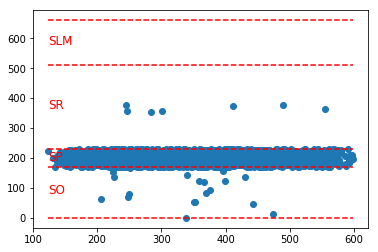

In [20]:
fig, ax = plt.subplots()
ax.scatter(x,y)
layer_heights = (0, 170, 230, 510, 660)
heights = (80, 190, 365, 580)
layers = ('SO', 'SP', 'SR', 'SLM')
ax.hlines(layer_heights, x.min(), x.max(), linestyle='--', colors='r')
for layer, height in zip(layers, heights):
    ax.text(x.min(), height, layer, fontsize=12, color='r')
fig.show()